In [1]:
from datetime import timedelta
import pandas

import swasputils

In [2]:
zoo_subjects = swasputils.ZooniverseSubjects()

C:\Users\anm83\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
SKIP_WORKFLOWS = {5214,17339}

In [4]:
retirement_counts = {}
for workflow_id, workflow_subjects in zoo_subjects.workflows.items():
    if workflow_id in SKIP_WORKFLOWS:
        continue
    retirement_dates = workflow_subjects.retired['retired_at']
    if len(retirement_dates.index) == 0:
        continue
    retirement_dates = retirement_dates.value_counts()
    retirement_dates.index = pandas.to_datetime(retirement_dates.index)
    retirement_dates.name = workflow_id
    retirement_counts[workflow_id] = retirement_dates.resample('1D').count()
retirement_counts = pandas.DataFrame(retirement_counts)

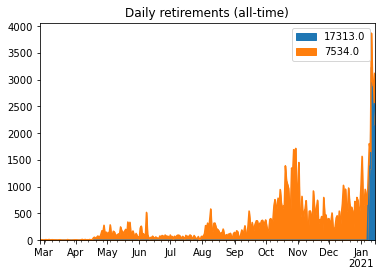

In [5]:
retirement_counts.plot.area(
    title='Daily retirements (all-time)',
)

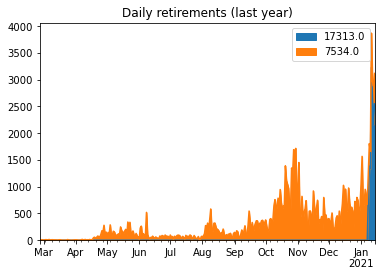

In [6]:
retirement_counts[
    retirement_counts.index >= (retirement_counts.index.max() - timedelta(days=365))
].plot.area(
    title='Daily retirements (last year)'
)

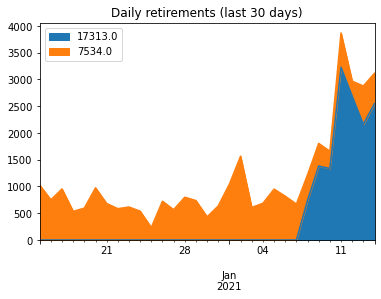

In [7]:
retirement_counts[
    retirement_counts.index >= (retirement_counts.index.max() - timedelta(days=30))
].plot.area(
    title='Daily retirements (last 30 days)'
)

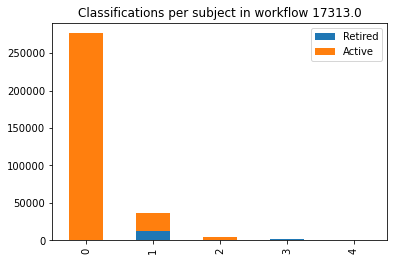

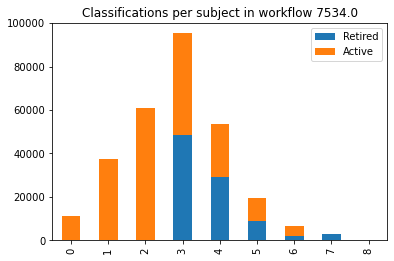

In [8]:
for workflow_id, workflow_subjects in zoo_subjects.workflows.items():
    if workflow_id in SKIP_WORKFLOWS:
        continue
    pandas.DataFrame({
        'Retired': workflow_subjects.retired['classifications_count'].value_counts(),
        'Active': workflow_subjects.active['classifications_count'].value_counts(),
    }).plot(
        title="Classifications per subject in workflow {}".format(workflow_id),
        stacked=True,
        kind='bar'
    )